# Mushroom Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
# Pipeline
from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('data/primary_data.csv', delimiter=';')
df

family               name class cap-diameter  cap-shape  \
0        Amanita Family         Fly Agaric     p     [10, 20]     [x, f]   
1        Amanita Family        Panther Cap     p      [5, 10]     [p, x]   
2        Amanita Family  False Panther Cap     p     [10, 15]     [x, f]   
3        Amanita Family        The Blusher     e      [5, 15]     [x, f]   
4        Amanita Family          Death Cap     p      [5, 12]     [x, f]   
..                  ...                ...   ...          ...        ...   
168   Saddle-Cup Family       White Saddle     p       [2, 6]        [o]   
169       Bracket Fungi     Elfin's Saddle     p       [2, 4]        [o]   
170       Bracket Fungi      Turban Fungus     p      [5, 15]        [o]   
171        Morel Family       Common Morel     e       [3, 8]  [p, c, o]   
172  Jelly Discs Family       Jelly Babies     p     [1, 1.5]  [x, f, s]   

    Cap-surface cap-color does-bruise-or-bleed gill-attachment gill-spacing  \
0        [g, h]    [e, o]                  [f]             [e]          NaN   
1           [g]       [n]                  [f]             [e]          NaN   
2           NaN    [g, n]                  [f]             [e]          NaN   
3           NaN       [n]                  [t]             NaN          NaN   
4           [h]       [r]                  [f]             NaN          [c]   
..          ...       ...                  ...             ...          ...   
168         NaN       [w]                  [f]             [f]          [f]   
169         NaN    [g, k]                  [f]             [f]          [f]   
170         NaN    [n, e]                  [f]             [f]          [f]   
171         NaN    [n, g]                  [f]             [f]          [f]   
172         [s]       [y]                  [f]             [f]          [f]   

     ... stem-root stem-surface stem-color veil-type veil-color has-ring  \
0    ...       [s]          [y]        [w]       [u]        [w]      [t]   
1    ...       NaN          [y]        [w]       [u]        [w]      [t]   
2    ...       NaN          NaN        [w]       [u]        [w]      [t]   
3    ...       [b]          NaN        [w]       [u]        [w]      [t]   
4    ...       NaN          NaN        [w]       [u]        [w]      [t]   
..   ...       ...          ...        ...       ...        ...      ...   
168  ...       NaN          [g]        [w]       NaN        NaN      [t]   
169  ...       NaN          [g]     [g, n]       NaN        NaN      [f]   
170  ...       NaN          [g]        [n]       NaN        NaN      [f]   
171  ...       NaN          NaN        [n]       NaN        NaN      [f]   
172  ...       NaN          NaN        [y]       NaN        NaN      [f]   

    ring-type Spore-print-color habitat     season  
0      [g, p]               NaN     [d]  [u, a, w]  
1         [p]               NaN     [d]     [u, a]  
2      [e, g]               NaN     [d]     [u, a]  
3         [g]               NaN     [d]     [u, a]  
4      [g, p]               NaN     [d]     [u, a]  
..        ...               ...     ...        ...  
168       [f]               NaN  [p, d]     [u, a]  
169       [f]               NaN     [d]     [u, a]  
170       [f]               NaN     [d]     [s, u]  
171       [f]               NaN  [l, d]        [s]  
172       [f]               NaN     [d]     [u, a]  

[173 rows x 23 columns]

In [3]:
df2 = pd.read_csv('data/secondary_data.csv', delimiter=';')
df2

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

In [4]:
df.columns

Index(['family', 'name', 'class', 'cap-diameter', 'cap-shape', 'Cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'Spore-print-color', 'habitat', 'season'],
      dtype='object')

In [5]:
df2.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
# establish X and y variables.
X = df2.drop('class', axis=1)
y = df2['class']

# Split data into train and test groups early to prevent data leakage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
y_test.value_counts() # not a large imbalance, but make sure to stratify anyway

p    6799
e    5415
Name: class, dtype: int64

In [8]:
df2.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [9]:
X_train

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
15929          6.03         f           h         k                    f   
14906          9.16         x           s         n                    f   
7808           3.62         f           d         b                    f   
55225          4.49         s           l         n                    f   
9496           3.32         b           g         n                    f   
...             ...       ...         ...       ...                  ...   
44032         10.70         p           y         w                    f   
39667          4.47         c           i         y                    f   
13369          0.62         f         NaN         o                    f   
20612          2.88         x           d         o                    f   
37588          2.28         p           t         n                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
15929               s            d          g         4.13        9.05   
14906               d            d          w         7.90       13.14   
7808                x            c          w         4.80        3.28   
55225               f            f          f         7.91       51.22   
9496                x            d          w         5.09        2.85   
...               ...          ...        ...          ...         ...   
44032               e            c          k        18.36       12.86   
39667             NaN            c          r         6.36        7.05   
13369               d          NaN          o         3.99        0.92   
20612               a            c          o         3.83        5.32   
37588               a            c          n         8.03        2.86   

      stem-root stem-surface stem-color veil-type veil-color has-ring  \
15929       NaN            s          g       NaN        NaN        f   
14906       NaN            i          n       NaN        NaN        t   
7808          b            s          n       NaN        NaN        f   
55225       NaN          NaN          n       NaN        NaN        f   
9496        NaN          NaN          y       NaN        NaN        f   
...         ...          ...        ...       ...        ...      ...   
44032       NaN            s          w       NaN        NaN        t   
39667       NaN          NaN          w       NaN        NaN        f   
13369       NaN          NaN          y       NaN        NaN        f   
20612       NaN          NaN          o       NaN        NaN        f   
37588       NaN            t          y       NaN        NaN        t   

      ring-type spore-print-color habitat season  
15929         f               NaN       d      a  
14906       NaN                 w       d      w  
7808          f               NaN       l      a  
55225         f                 g       l      a  
9496          f               NaN       g      u  
...         ...               ...     ...    ...  
44032         e               NaN       g      s  
39667         f               NaN       d      u  
13369         f                 w       g      a  
20612         f               NaN       m      u  
37588         e               NaN       m      a  

[48855 rows x 20 columns]

In [10]:
# separate columns into numeric, nominal, and ordinal
num_cols = X_train.select_dtypes(['int', 'float']).columns
cat_cols = X_train.select_dtypes(['object']).columns

#cat_cols = X_train[['cap-shape','cap-surface','cap-color','gill-attachment',
#                   'gill-color','stem-root','stem-surface','stem-color','veil-color',
#                   'ring-type','spore-print-color','habitat','season']]
#ord_cols = X_train[['does-bruise-or-bleed','gill-spacing','veil-type','has-ring']]

In [11]:
# Baseline model

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    #('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first'))])

ordinal_pipeline = Pipeline([
    #('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder())])


    
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, cat_cols),
                        ("numpipe", numeric_pipeline, num_cols)])
                        #,('ordpipe', ordinal_pipeline, ord_cols)])

model_pipe1 = Pipeline([('preprocess', ct),('model', LogisticRegression(max_iter=400))])



model_pipe1.fit(X_train,y_train)
print('train score: {}'.format(model_pipe1.score(X_train,y_train)))
print('test score: {}'.format(model_pipe1.score(X_test,y_test)))
model_pipe1

train score: 0.8660321359123938
test score: 0.8661372195840839


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=400))])

In [12]:
model_pipe2 = Pipeline([('preprocess', ct),('knn', KNeighborsClassifier())])
model_pipe2.fit(X_train, y_train)
print('train score: {}'.format(model_pipe2.score(X_train,y_train)))
print('test score: {}'.format(model_pipe2.score(X_test,y_test)))
model_pipe2

train score: 1.0
test score: 1.0


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


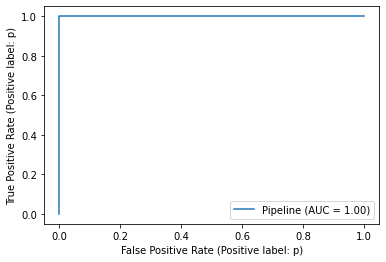

In [13]:
plot_roc_curve(model_pipe2, X_test, y_test)

C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


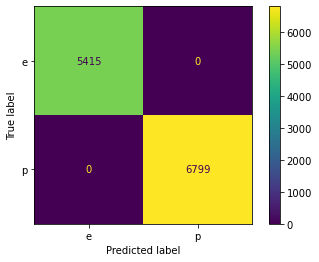

In [14]:
plot_confusion_matrix(model_pipe2, X_test, y_test)
# eliminating this and any future false negatives needs to be top priority

In [15]:
# Allow it to run the full default hyperparameters on a decision tree model
tree_clf = DecisionTreeClassifier(max_depth=50,random_state=42)

model_pipe3 = Pipeline([('preprocess', ct), ('d_tree', tree_clf)])
model_pipe3.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', model_pipe3.score(X_train, y_train))
print('Testing:', model_pipe3.score(X_test, y_test))

Training: 1.0
Testing: 0.9991812673980678


In [16]:
feature_used = X.columns

for fi, feature in zip(tree_clf.feature_importances_, feature_used):
    print(fi, feature)

0.04355797466419469 cap-diameter
0.015244983852756673 cap-shape
0.00010729122173774778 cap-surface
0.0 cap-color
0.0038292094467295636 does-bruise-or-bleed
0.007171273637957188 gill-attachment
0.0176395273190852 gill-spacing
0.014460490906150276 gill-color
0.009946820293321518 stem-height
0.0 stem-width
0.0 stem-root
0.02290397928840416 stem-surface
0.026443363560061366 stem-color
0.0 veil-type
0.0 veil-color
0.018175730494680294 has-ring
0.020877966960534462 ring-type
0.0 spore-print-color
0.001765491098786489 habitat
0.0005650153114125321 season


In [17]:
f, ax = plt.subplots(figsize=(250, 250))
plot_tree(tree_clf, ax=ax);

In [18]:
# start timer
starttime = time.time()
print('Start timer')

# hyperparameter tuning
pipe_grid = {'preprocess__numpipe__numimputer__strategy': ['mean', 'median', 'most_frequent'],
             'knn__n_neighbors': [3, 5, 7],
             'knn__p': [1, 2]}

# note: default scoring is accuracy
gs_pipe = GridSearchCV(estimator=model_pipe2, 
                       param_grid=pipe_grid)

gs_pipe.fit(X_train, y_train)
print('train score: {}'.format(model_pipe2.score(X_train,y_train)))
print('test score: {}'.format(model_pipe2.score(X_test,y_test)))

# end timer
endtime = time.time()

# display time elapsed
converttime = time.strftime("%H:%M:%S", time.gmtime(endtime - starttime))
print('Time elapsed: {}'.format(converttime))

Start timer
train score: 1.0
test score: 1.0
Time elapsed: 00:34:45


In [19]:
print(y_test)

34384    p
13619    p
11216    p
27146    e
3318     e
        ..
55015    e
43293    p
17930    e
60605    e
30702    e
Name: class, Length: 12214, dtype: object


In [20]:
best_model1 = gs_pipe.best_estimator_
y_pred1 = best_model1.predict(X_test)


In [21]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5415
           p       1.00      1.00      1.00      6799

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [22]:
# use this score instead of the other one in the cell above for this model.
print('train score: {}'.format(gs_pipe.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe.score(X_test,y_test)))

train score: 1.0
test score: 1.0


In [23]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=3, p=1))])

In [24]:
# start timer
starttime = time.time()
print('Start timer')

# Narrow down hyperparameters to make a quicker grid search
pipe_grid2 = {'preprocess__numpipe__numimputer__strategy': ['mean','most_frequent'],
             'knn__n_neighbors': [1,2,3,4],
             'knn__p': [1]}

gs_pipe2 = GridSearchCV(estimator=model_pipe2, 
                       param_grid=pipe_grid2)

gs_pipe2.fit(X_train, y_train)
print('train score: {}'.format(gs_pipe2.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe2.score(X_test,y_test)))

# end timer
endtime = time.time()

# display time elapsed
converttime = time.strftime("%H:%M:%S", time.gmtime(endtime - starttime))
print('Time elapsed: {}'.format(converttime))

Start timer
train score: 1.0
test score: 1.0
Time elapsed: 01:11:49


In [ ]:
# try to get feature names out ct.get_feature_names_out()
# try ct.get_feature_importance('classifier')

In [25]:
best_model2 = gs_pipe2.best_estimator_
best_model2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=1, p=1))])

In [26]:
gs_pipe2.best_params_

{'knn__n_neighbors': 1,
 'knn__p': 1,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [27]:
gs_pipe.best_params_

{'knn__n_neighbors': 3,
 'knn__p': 1,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [ ]:
# start timer
starttime = time.time()
print('Start timer')

# Narrow down hyperparameters to make a quicker grid search
pipe_grid3 = {'preprocess__numpipe__numimputer__strategy': ['mean'],
             'knn__n_neighbors': [2,3],
             'knn__p': [1,2]}

gs_pipe3 = GridSearchCV(estimator=model_pipe2, 
                       param_grid=pipe_grid3)

gs_pipe3.fit(X_train, y_train)
print('train score: {}'.format(gs_pipe3.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe3.score(X_test,y_test)))

# end timer
endtime = time.time()

# display time elapsed
converttime = time.strftime("%H:%M:%S", time.gmtime(endtime - starttime))
print('Time elapsed: {}'.format(converttime))

Start timer


In [ ]:
# lets make some data that contains deliberately misclassified mushrooms to make the model picks that up
X_test_fakes = X_test[:][:20]
X_test_fakes